# Taller 2 - Tercer Corte - Uso de librerías PyOD y LocalOutlierFactor

## Parte 1 - Carga del dataset `creditcardcsvpresent.csv`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cambiamos de directorio
%cd '/content/drive/MyDrive/Python'

/content/drive/MyDrive/Python


In [ ]:
# Cargamos el dataset
credit=pd.read_csv('./creditcardcsvpresent.csv')
credit.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [ ]:
# Eliminación de variables categóricas.
credit_n = credit.drop([ 'Transaction date', 'Is declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent'], axis=1)
credit_n.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,3160040998,100.0,3000.0,5,0,0.0,0
1,3160040998,100.0,4300.0,5,0,0.0,0
2,3160041896,185.5,4823.0,5,0,0.0,0
3,3160141996,185.5,5008.5,8,0,0.0,0
4,3160241992,500.0,26000.0,0,800,677.2,6


## Parte 2 - Uso de librería PyOD

Aplicar la PyOD para detectar outliers en el dataset `creditcardcsvpresent.csv`.

De este proceso indicar si eliminó columnas, cuáles fueron y el porqué lo hizo. Adicionalmente, haga un análisis de la información obtenida.

In [ ]:
!pip install pyod  # instala la librería
from pyod.models.knn import KNN
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:


# Creamos y entrenamos el modelo con la técnica K-Nearest-Neighbor
clf = KNN(contamination=0.18).fit(credit_n)
# Realizamos la predicción con los datos del dataframe.
y_pred_pyod = clf.predict(credit_n)
# Separamos los datos que solo su predicción como dato anómalo es 1.
credit_n[y_pred_pyod == 1]


,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
15,3369900897,257.091167,10283.646670,4,0,0.0,0
25,3450127241,780.688498,36692.359410,0,896,839.0,6
26,3462219091,947.489028,44531.984300,7,0,0.0,0
27,3465787492,172.515767,5002.957249,9,0,0.0,0
33,3527533497,998.344074,26955.290010,0,701,585.0,8
...,...,...,...,...,...,...,...
3015,6600249491,614.522271,7374.267254,1,0,0.0,0
3016,6600708313,840.944556,10932.279230,1,0,0.0,0
3049,6643562617,259.952617,2859.478791,0,0,0.0,0
3050,6644492798,240.483553,6012.088823,0,0,0.0,0


Ejecute la siguiente celda:

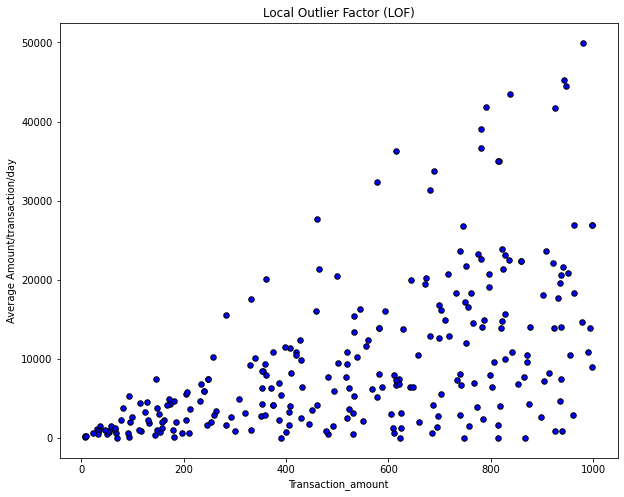

In [ ]:
X = credit_n[['Average Amount/transaction/day','Transaction_amount']].values
X[y_pred_pyod==1]

in_mask_pyod = [True if l == 1 else False for l in y_pred_pyod]
out_mask_pyod = [True if l == -1 else False for l in y_pred_pyod]

plt.figure(figsize=(10,8))
plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask_pyod, 0], X[in_mask_pyod, 1],
                c = 'blue', edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask_pyod, 0], X[out_mask_pyod, 1],
                c = 'red', edgecolor = 'k', s = 30)

plt.xlabel('Transaction_amount');
plt.ylabel('Average Amount/transaction/day');
plt.show()


## Parte 3 - Uso de librería LocalOutlierFactor

**Tabajo previo:**

Investigue información sobre esta librería y defina qué son los hiperparámetros `n_neighbors` y `contamination`, y qué tipo de valores reciben.

Coloque esta información en la siguiente celda de texto:

**Información sobre `LocalOutlierFactor` y sus hiperparámetros aquí:**

Ejecute las siguientes celdas:

In [ ]:
from sklearn.neighbors import LocalOutlierFactor


In [ ]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = credit_n[['Average Amount/transaction/day','Transaction_amount']].values
y_pred = clf.fit_predict(X)
credit_n[y_pred == 1]

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,3160040998,100.0,3000.0,5,0,0.0,0
1,3160040998,100.0,4300.0,5,0,0.0,0
2,3160041896,185.5,4823.0,5,0,0.0,0
3,3160141996,185.5,5008.5,8,0,0.0,0
4,3160241992,500.0,26000.0,0,800,677.2,6
...,...,...,...,...,...,...,...
3069,6661273529,1000.0,25000.0,0,754,585.0,7
3070,6661273532,500.0,11000.0,0,754,585.0,7
3071,6661273532,800.0,0.0,0,754,585.0,7
3072,6661273533,800.0,20800.0,0,754,585.0,7


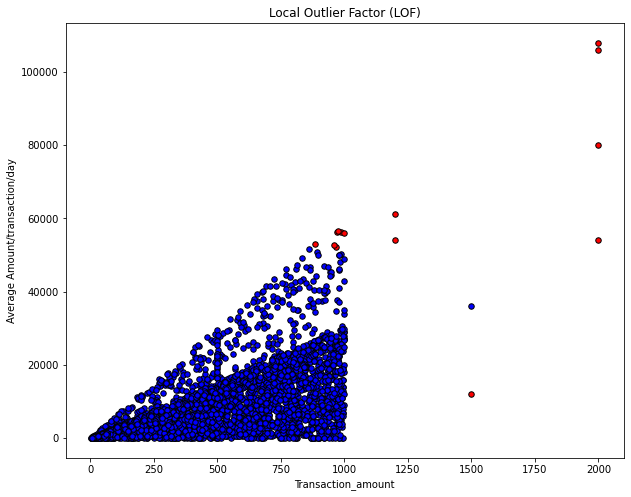

In [ ]:
in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,8))
plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1],
                c = 'blue', edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1],
                c = 'red', edgecolor = 'k', s = 30)

plt.xlabel('Transaction_amount');
plt.ylabel('Average Amount/transaction/day');
plt.show()

**Responda a las siguientes preguntas:**

*   ¿Qué diferencia(s) encuentra entre las dos librerías para detectar outliers `PyOD` y `LocalOutlierFactor`?
*   ¿Porqué cree que las gráficas de puntos resultantes son tan diferentes para las dos librerías?



*   mientras que la libreria pyod elimna directamente los auotliers localOutlierfactor los deja y reslata en rojo de ahi la diferencia en los rangos
*   esto se debe a los valores eliminados en pyod que le dan un rango menor y le permiten verse mas dispersos, contrario a la densidad que se ve en la otra libreria por que debe tener un rango mayor para mostras los outliers

